# Predict which house is qualified for sell

- add scaling?
- Ml/Dl to predict price

In [49]:
import pandas as pd
import numpy as np
import joblib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Assignment-HousingDataset.csv")

## Remove categorical features if there is a number 

In [3]:
cols_to_drop = ['row ID',
                'HEAT_D',
                'STYLE_D',
                'STRUCT_D',
                'GRADE_D',
                'CNDTN_D',
                'EXTWALL_D',
                'ROOF_D',
                'INTWALL_D',
                'GIS_LAST_MOD_DTTM',
               ]

df.drop(columns= cols_to_drop,
        inplace=True)

In [4]:
# Find out how many missing values for column
missing_vals = df.isna().sum()
missing_vals

BATHRM           20
HF_BATHRM        21
HEAT             20
AC               20
NUM_UNITS        20
ROOMS            32
BEDRM            24
AYB              10
YR_RMDL       40473
EYB               0
STORIES          52
SALEDATE          0
PRICE         13506
SALE_NUM          0
GBA               0
BLDG_NUM          0
STYLE            20
STRUCT           20
GRADE            20
CNDTN            20
EXTWALL          20
ROOF             20
INTWALL          20
KITCHENS         21
FIREPLACES       21
USECODE           0
LANDAREA          0
QUALIFIED         0
dtype: int64

In [5]:
# miss_array = np.array(missing_vals.values)
# np.savetxt('missing_vals.csv', miss_array)

In [6]:
df

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,QUALIFIED
0,3.0,1.0,7.0,Y,2.0,11.0,5.0,1898.0,2007.0,1972,...,6.0,4.0,14.0,2.0,6.0,2.0,4.0,24,1680,0
1,3.0,1.0,13.0,Y,2.0,9.0,5.0,1910.0,2009.0,1984,...,6.0,5.0,14.0,2.0,6.0,2.0,4.0,24,1680,1
2,2.0,1.0,7.0,Y,1.0,11.0,3.0,1913.0,2012.0,1985,...,6.0,4.0,14.0,13.0,6.0,1.0,0.0,13,2032,0
3,3.0,2.0,13.0,Y,1.0,10.0,5.0,1913.0,NaN,1972,...,6.0,4.0,14.0,2.0,6.0,1.0,4.0,11,2196,1
4,3.0,1.0,7.0,Y,2.0,7.0,3.0,1908.0,2008.0,1967,...,4.0,5.0,14.0,2.0,6.0,2.0,1.0,24,1424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75002,2.0,0.0,7.0,Y,2.0,10.0,4.0,1953.0,NaN,1962,...,3.0,3.0,14.0,2.0,6.0,2.0,0.0,23,5872,0
75003,2.0,0.0,1.0,N,2.0,8.0,4.0,1953.0,NaN,1962,...,3.0,3.0,14.0,2.0,6.0,2.0,0.0,23,6337,0
75004,2.0,0.0,1.0,N,2.0,10.0,5.0,1953.0,NaN,1962,...,3.0,3.0,14.0,2.0,6.0,2.0,0.0,23,5348,0
75005,2.0,0.0,1.0,N,2.0,10.0,4.0,1953.0,NaN,1953,...,3.0,3.0,14.0,2.0,6.0,2.0,0.0,23,3466,0


## Convert Dates to Datetime Format

In [7]:
df['SALEDATE'] = df['SALEDATE'].map(lambda x: x.split('T', 1)[0])
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], format='%Y-%m-%d')

In [8]:
df['SALEDATE'].value_counts()

1900-01-01    15885
1999-04-01      145
2001-01-01      132
2006-10-12       47
2017-05-23       45
              ...  
1993-05-14        1
1985-01-11        1
1994-01-04        1
1987-07-28        1
1980-09-03        1
Name: SALEDATE, Length: 6634, dtype: int64

Option 1: Get bins of decades e.g. 1900-1910 is category 1 and so on
Option 2: Get the year only, don't care about month and day

Choosing Option 2 for now

In [9]:
df['SALEDATE_YEAR']= pd.DatetimeIndex(df['SALEDATE']).year

In [10]:
df.drop(columns=['SALEDATE'], inplace=True)

## Convert Y, N to 1, 0 respectively

In [11]:
replacement ={
    "AC": {"Y":1, "N": 0}
    
}

df = df.replace(replacement)

## Missing Values
### Price
WHy? Find out how to get average price
https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e ML or DL

In [12]:
df['PRICE'] = df.groupby(['BATHRM', 
                          'GRADE', 
                          'CNDTN'])['PRICE'].transform(
    lambda grp: grp.fillna(np.mean(grp)))

### Year Remodeled
If no remodelling, give a different class

In [13]:
df['YR_RMDL'] = df['YR_RMDL'].fillna(0)

In [14]:
df.isna().sum()

BATHRM           20
HF_BATHRM        21
HEAT             20
AC               20
NUM_UNITS        20
ROOMS            32
BEDRM            24
AYB              10
YR_RMDL           0
EYB               0
STORIES          52
PRICE            41
SALE_NUM          0
GBA               0
BLDG_NUM          0
STYLE            20
STRUCT           20
GRADE            20
CNDTN            20
EXTWALL          20
ROOF             20
INTWALL          20
KITCHENS         21
FIREPLACES       21
USECODE           0
LANDAREA          0
QUALIFIED         0
SALEDATE_YEAR     0
dtype: int64

## Drop all rows with missing values

In [15]:
df.dropna(inplace=True)

## Split Into Train, Validate and Test

In [16]:
#Train test split 
from sklearn.model_selection import train_test_split
df_y = df.pop("QUALIFIED") 
train_X, test_X, train_y, test_y = train_test_split(df, df_y,
                                                    test_size=0.2,
                                                    random_state=1
                                                   )

In [17]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(59927, 27)
(14982, 27)
(59927,)
(14982,)


# Is the dataset unbalanced?

In [32]:
df_y.value_counts()

0    42620
1    32289
Name: QUALIFIED, dtype: int64

# Creating Model

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler


## Decision Tree
- try different params

In [79]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    RobustScaler(),
    DecisionTreeClassifier(max_depth=5)
)
    
pipe.fit(train_X, train_y)



Pipeline(steps=[('robustscaler', RobustScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])

In [80]:
y_pred = pipe.predict(test_X)
print("Accuracy:",accuracy_score(test_y, y_pred))
confusion_matrix(test_y, y_pred)

Accuracy: 0.8966760112134562


array([[7306, 1270],
       [ 278, 6128]])

CPU times: user 156 ms, sys: 41.5 ms, total: 198 ms
Wall time: 196 ms


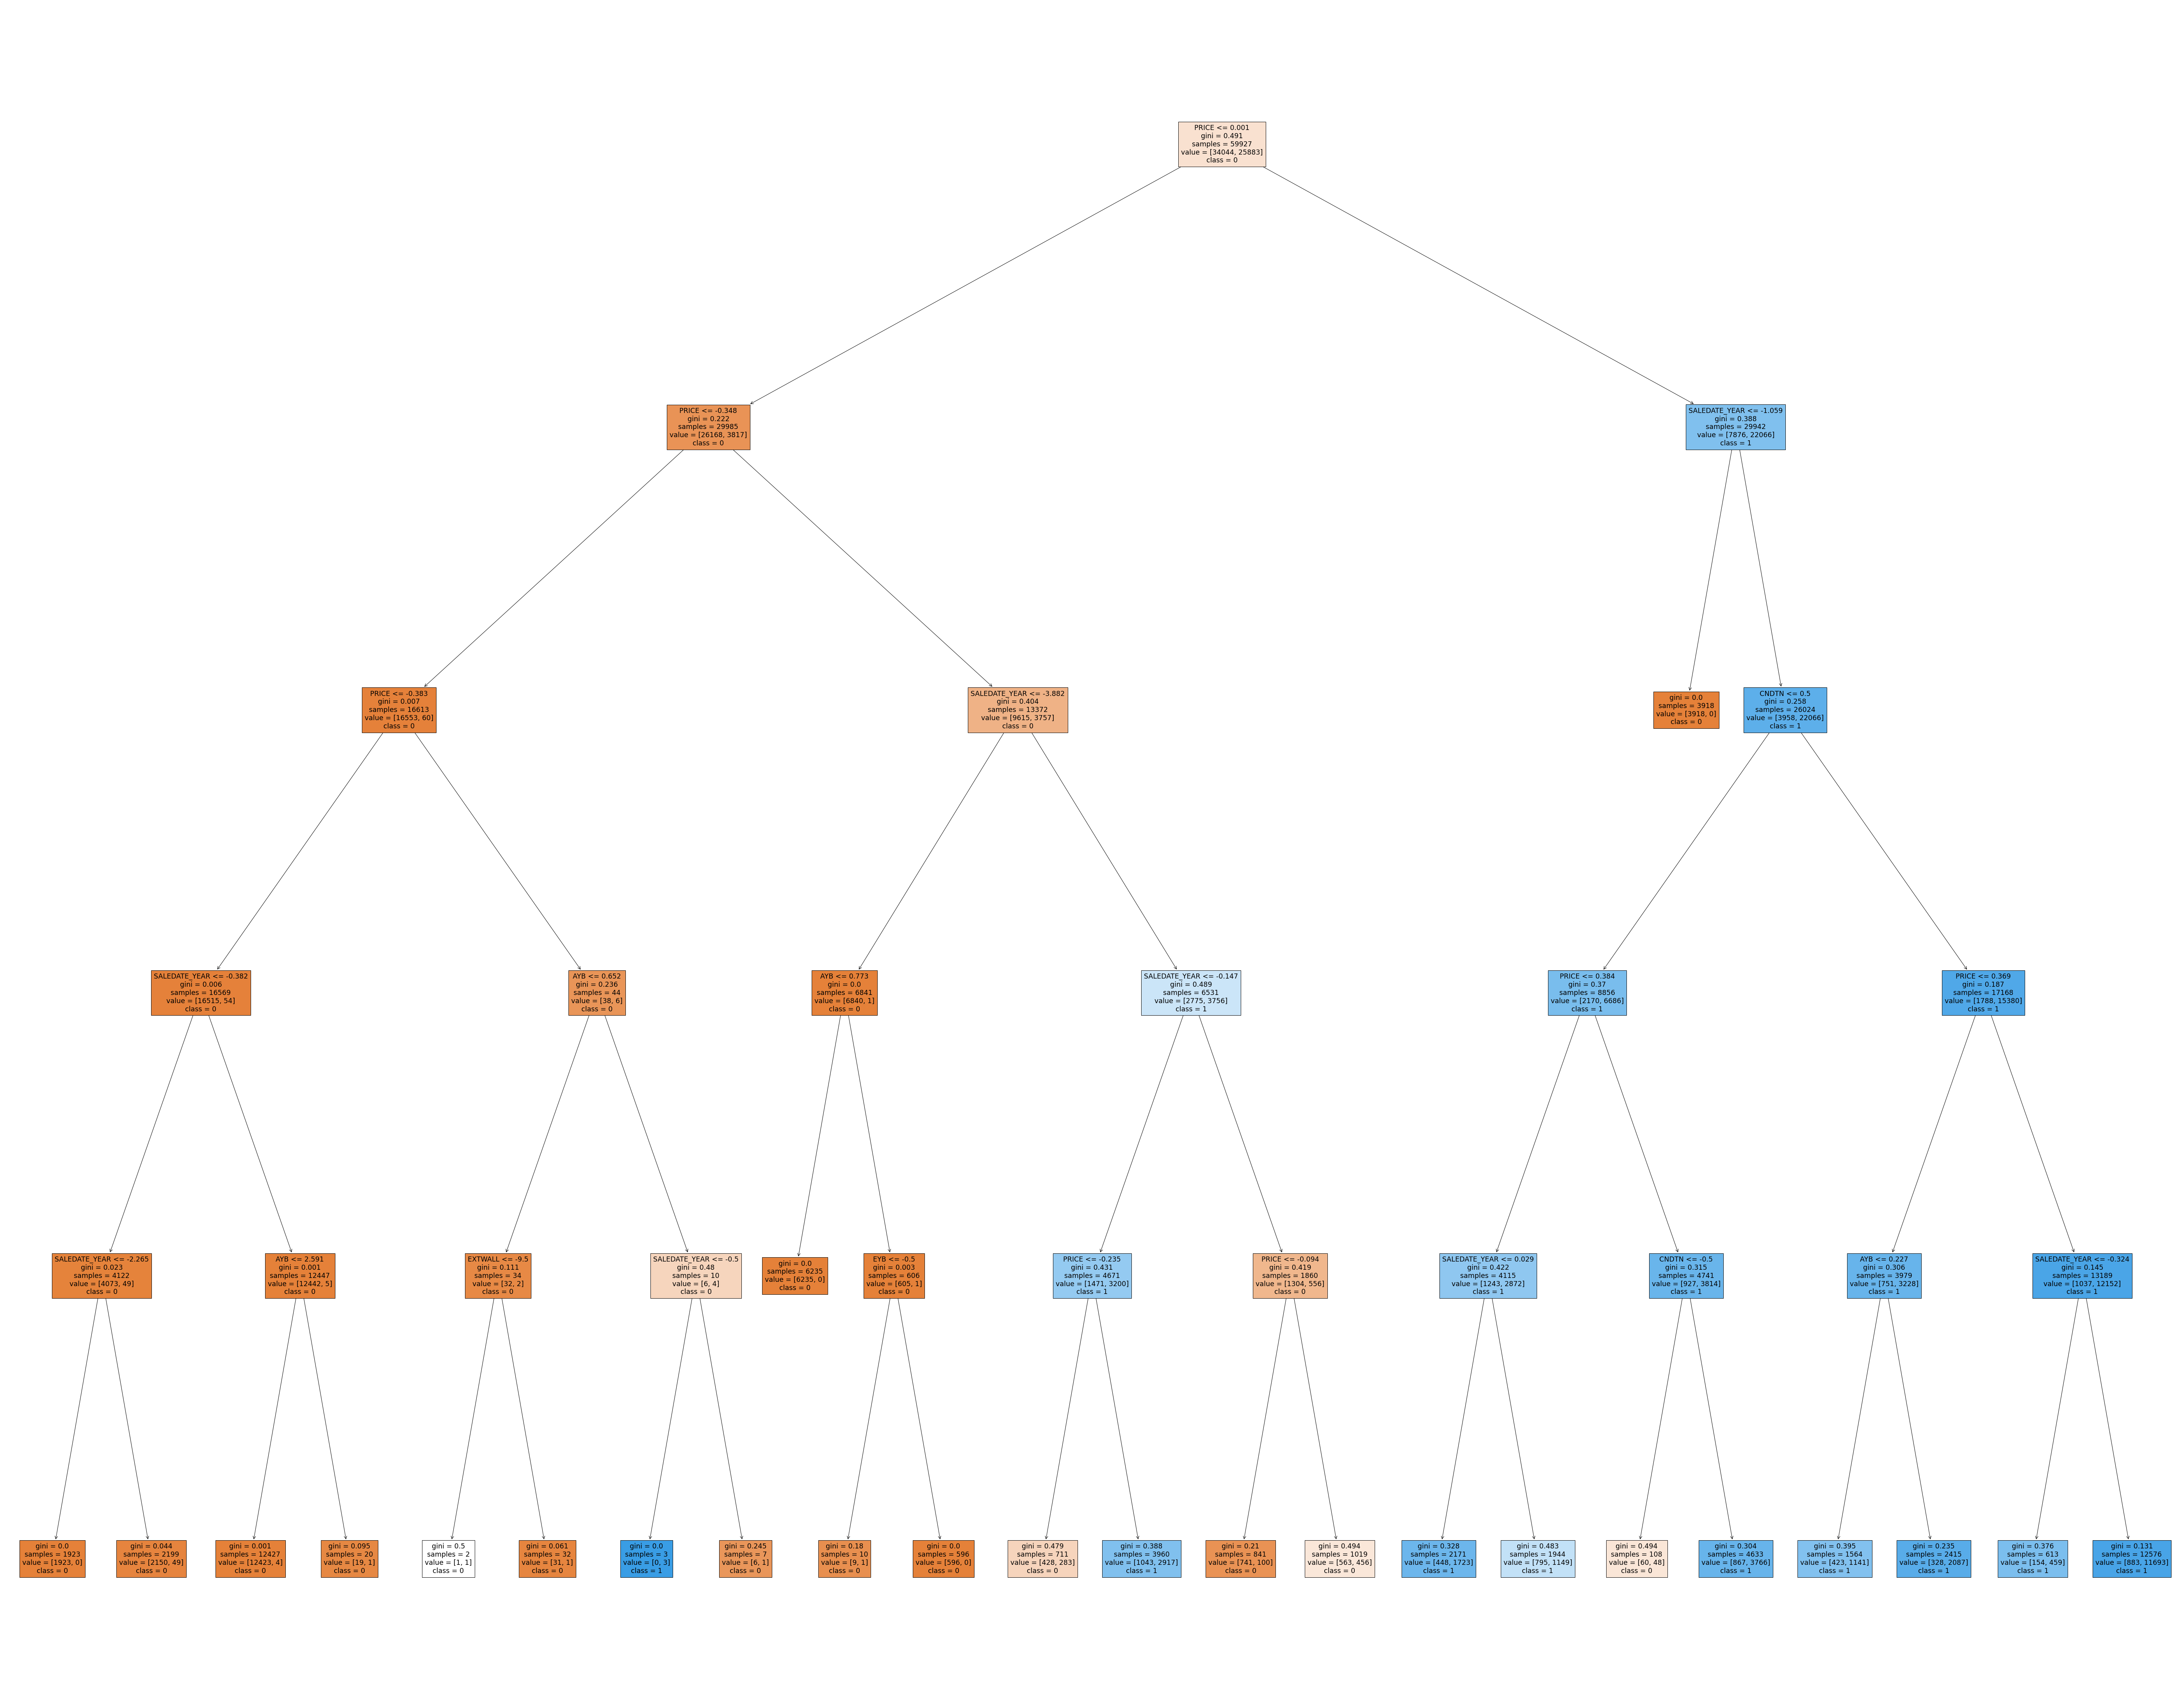

In [81]:
%%time
feature_cols = df.columns
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(pipe['decisiontreeclassifier'], 
                   feature_names=feature_cols,  
                   class_names=['0', '1'],
                   filled=True)

In [82]:
fig.savefig("decision_tree.png")

In [83]:
joblib.dump(pipe, 'decision_tree.pkl')

['decision_tree.pkl']

## SVM
- training longer (increase iterations seems to improve accuracy)
- using a feature scaler reduced training time a lot https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
    - places equal importance for each feature
    - converges faster, shorter distance

In [87]:
%%time
from sklearn import svm
pipe = make_pipeline(
    StandardScaler(),
    svm.SVC(max_iter=40000, verbose=True)
)

pipe.fit(train_X, train_y)

[LibSVM].....................*........*
optimization finished, #iter = 29256
obj = -16301.971181, rho = -0.941248
nSV = 19139, nBSV = 16943
Total nSV = 19139
CPU times: user 1min 40s, sys: 613 ms, total: 1min 41s
Wall time: 1min 41s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(max_iter=40000, verbose=True))])

In [ ]:
y_pred = clf.predict(test_X)
print("Accuracy:",accuracy_score(test_y, y_pred))
confusion_matrix(test_y, y_pred)

In [ ]:
joblib.dump(pipe, 'svm.pkl')

## XGBoost

## KNN 